In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd  # for reading and making targets
from sklearn.model_selection import train_test_split # to split the train and test data
from sklearn.metrics import mean_absolute_error # to find MAE
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

df = pd.read_csv('pharmacy_otc_sales_data.csv')

df.head()


,Date,Product,Sales Person,Boxes Shipped,Amount ($),Country
0,2022-02-06,Pain Relief Tablets,Divya Mehra,7,67.43,Australia
1,2022-02-05,Antiseptic Cream,Nikhil Batra,18,421.46,Canada
2,2022-02-19,Cough Syrup,Ritika Shah,2,48.25,UK
3,2022-03-28,Pain Relief Tablets,Nikhil Batra,5,59.89,UK
4,2022-01-17,Digestive Enzyme,Ritika Shah,8,147.73,USA


In [24]:
df.isnull().sum()

Date             0
Product          0
Sales Person     0
Boxes Shipped    0
Amount ($)       0
Country          0
dtype: int64

In [25]:
y = df['Amount ($)']

features = ['Boxes Shipped', 'Product', 'Country','Sales Person']

X = df[features]

train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.2, train_size=0.8)

In [26]:
#see which one we should onehot encode
print(df['Product'].unique())

print(df['Country'].unique())

print(df['Sales Person'].unique())

df.columns[2]

['Pain Relief Tablets' 'Antiseptic Cream' 'Cough Syrup' 'Digestive Enzyme'
 'Eye Drops' 'Nasal Spray' 'Allergy Pills']
['Australia' 'Canada' 'UK' 'USA' 'India']
['Divya Mehra' 'Nikhil Batra' 'Ritika Shah' 'Priya Singh' 'Sneha Iyer'
 'Rajesh Patel' 'Aman Verma']


'Sales Person'

In [27]:

features_to_encode = ['Country', 'Product', df.columns[2]]
 #function to encode the functions before we scale them
def ordinalencodes():
    encoder = OrdinalEncoder()
    trainx = train_X[features_to_encode] = encoder.fit_transform(train_X[features_to_encode])
    valx = val_X[features_to_encode] = encoder.transform(val_X[features_to_encode])
    return trainx, valx 
trainx,valx = ordinalencodes()

In [28]:
#lets preprocess the data beefore 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainx)  # Standardize input features
X_val_scaled = scaler.transform(valx)

X_train_scaled = np.array(X_train_scaled).astype('float32') # needs to be converted into a np array instead of the standard scaler
X_val_scaled = np.array(X_val_scaled).astype('float32')

In [29]:
#now lets try to fit them to our mdel
input_shape = [X_train_scaled.shape[1]]

Model = keras.Sequential([layers.BatchNormalization(input_shape=input_shape),
                          layers.Dense(units=256, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(units=256, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(units=256, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(units=1) ])

Model.compile(optimizer='adam',
              loss='mae'
              )

earlystopping = keras.callbacks.EarlyStopping(patience=20, min_delta=0.001, restore_best_weights=True)


plotting = Model.fit(X_train_scaled, train_y, validation_data=(X_val_scaled,val_y), callbacks=[earlystopping], batch_size=256, epochs=1000)




Epoch 1/1000


/Users/samuelandersen/Desktop/***REDACTED**/.venv/lib/python3.9/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 838ms/step - loss: 179.7564 - val_loss: 165.2218
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 179.8401 - val_loss: 165.1756
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 180.2129 - val_loss: 165.1290
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 179.9309 - val_loss: 165.0816
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 179.5992 - val_loss: 165.0420
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 179.3920 - val_loss: 164.9896
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 179.2800 - val_loss: 164.9401
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 179.6028 - val_loss: 164.8799
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 180.4101 - val_loss: 164.8164
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 178.8238 - val_loss: 164.7499
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 178.9688 - val_loss: 164.6820
Epoch 12/1000
2/2 ━━━━━━━━━━━━━

<Axes: >

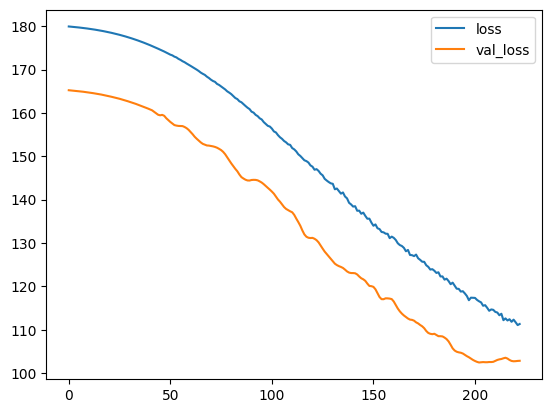

In [30]:
plotdf = pd.DataFrame(plotting.history)
plotdf.loc[:,['loss', 'val_loss']].plot()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


<Axes: >

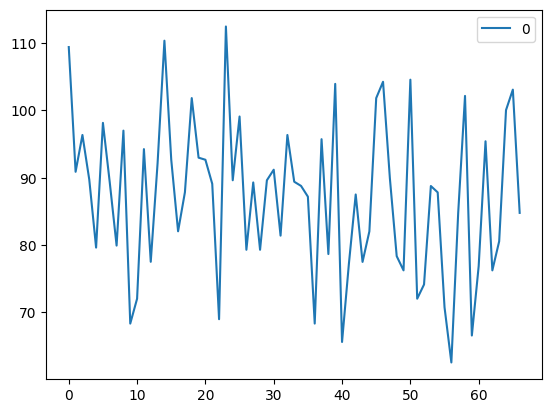

In [32]:
predicted1 = Model.predict(X_val_scaled)

mean_absolute_error(predicted1, val_y)

modelplot = pd.DataFrame(Model.predict(X_val_scaled)) # plotting the data 

modelplot.plot()